# **1. Import Library**

Tahap ini adalah dasar dari pipeline machine learning. Library yang diimpor meliputi manipulasi data, visualisasi, preprocessing, pembangunan model, dan evaluasi model. Pengorganisasian yang sistematis seperti ini memudahkan alur pengerjaan dan memastikan semua kebutuhan untuk analisis data tersedia.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

Pada tahap ini, dataset hasil dari proses clustering sebelumnya dimuat untuk dipersiapkan sebagai data awal untuk klasifikasi. Dataset ini memuat label cluster yang akan digunakan sebagai target dalam model klasifikasi.

Tujuan utama tahap ini adalah:

Memastikan dataset berhasil dimuat ke dalam program tanpa error.
Meninjau struktur dataset untuk memahami kolom, tipe data, serta jumlah data yang tersedia.
Mengidentifikasi potensi masalah seperti nilai kosong atau tipe data yang tidak sesuai sebelum proses lebih lanjut.
Hasil yang diharapkan dari tahap ini adalah tampilan awal dataset dan informasi rinci tentang jumlah baris, kolom, tipe data, serta kelengkapan data.

In [2]:
# Load dataset
data = pd.read_csv('clustered_data.csv')

# Tampilkan data
print(data.head())

# Periksa informasi dataset
data.info()


   Customer ID  Age  Annual Income  Family Size  Spending Score  \
0         5524   67       0.087207            0         0.51264   
1         2174   70       0.069516            2         0.51264   
2         4141   59       0.107420            0         0.51264   
3         6182   40       0.039969            1         0.51264   
4         5324   43       0.087440            1         0.51264   

   Work Experience  Education_Basic  Education_Graduation  Education_Master  \
0         0.238591            False                  True             False   
1         0.238591            False                  True             False   
2         0.238591            False                  True             False   
3         0.238591            False                  True             False   
4         0.238591            False                 False             False   

   Education_PhD  ...  Marital Status_Together  Marital Status_Widow  \
0          False  ...                    False    

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

Pada tahap ini, dataset dipisahkan menjadi dua bagian: data latih (training set) dan data uji (testing set). Langkah ini bertujuan untuk mempersiapkan data yang akan digunakan untuk membangun dan mengevaluasi model klasifikasi.

Tahapan utama yang dilakukan:

1. Pisahkan Fitur dan Label: Kolom fitur (X) digunakan untuk memprediksi, sedangkan kolom label (y) menjadi target yang akan diprediksi oleh model.
2. Pembagian Data: Data dibagi menjadi dua bagian:
    - Data Latih (Training Set): Sebesar 80% dari data, digunakan untuk melatih model.
    - Data Uji (Testing Set): Sebesar 20% dari data, digunakan untuk mengukur performa model pada data baru yang belum dilihat sebelumnya.

In [3]:
# Pisahkan fitur dan label
X = data.drop(columns=['Cluster'])
y = data['Cluster']

# Pisahkan data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk data
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")


Shape of X_train: (1791, 23)
Shape of X_test: (448, 23)


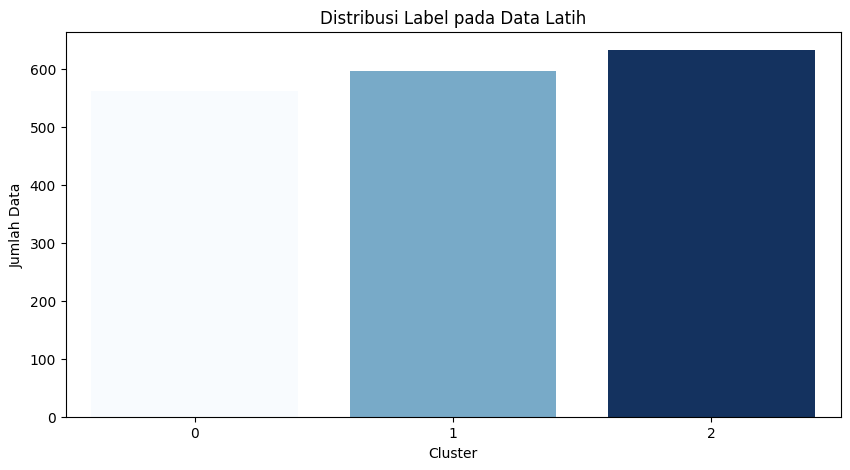

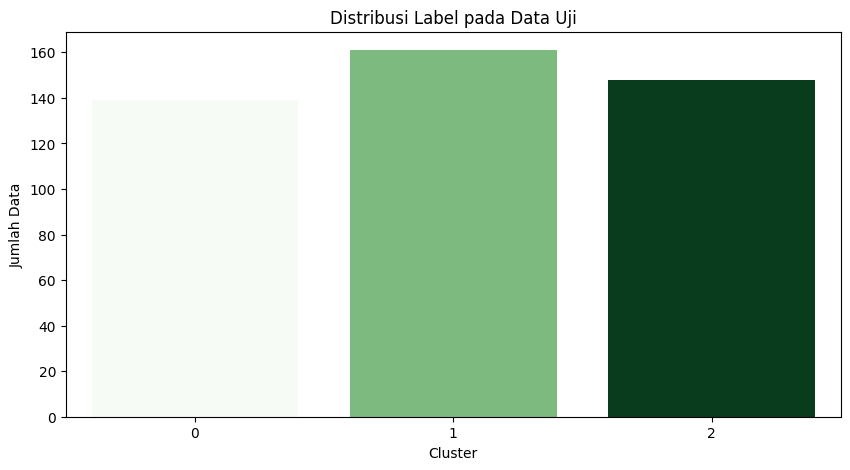

In [5]:
# Distribusi pada Data Latih
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train, hue=y_train, palette='Blues', legend=False)
plt.title('Distribusi Label pada Data Latih')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.show()

# Distribusi pada Data Uji
plt.figure(figsize=(10, 5))
sns.countplot(x=y_test, hue=y_test, palette='Greens', legend=False)
plt.title('Distribusi Label pada Data Uji')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Data')
plt.show()


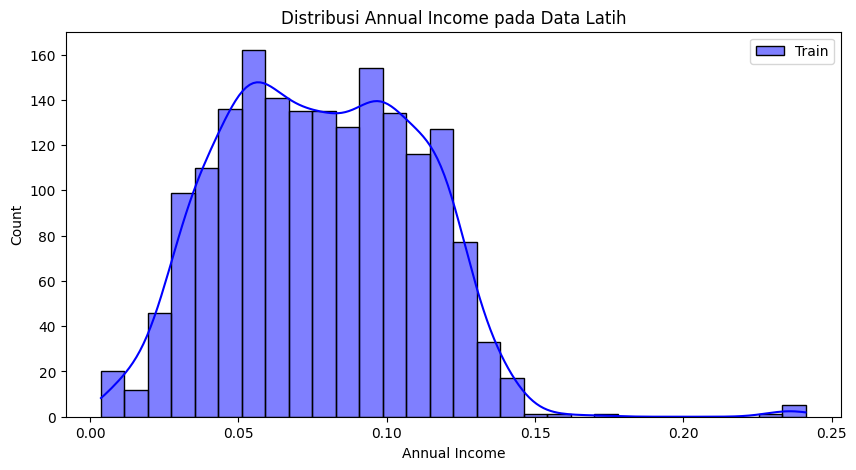

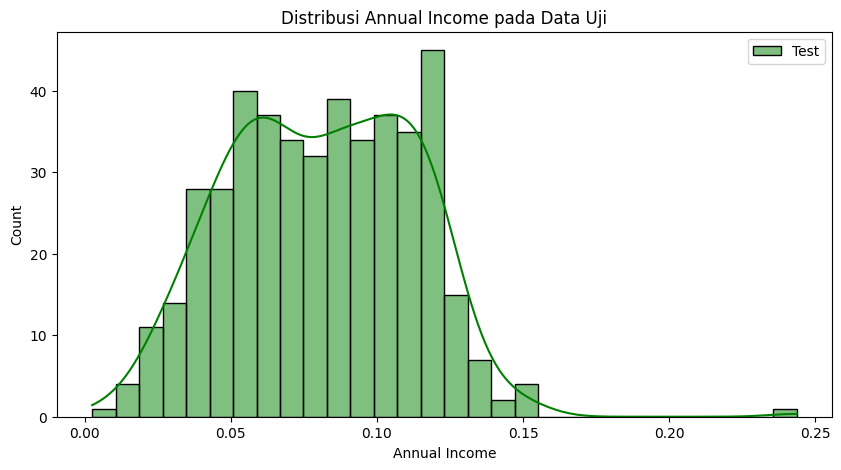

In [6]:
# Distribusi Fitur Numerik pada Data Latih
plt.figure(figsize=(10, 5))
sns.histplot(X_train['Annual Income'], kde=True, color='blue', bins=30, label='Train')
plt.title('Distribusi Annual Income pada Data Latih')
plt.xlabel('Annual Income')
plt.legend()
plt.show()

# Distribusi Fitur Numerik pada Data Uji
plt.figure(figsize=(10, 5))
sns.histplot(X_test['Annual Income'], kde=True, color='green', bins=30, label='Test')
plt.title('Distribusi Annual Income pada Data Uji')
plt.xlabel('Annual Income')
plt.legend()
plt.show()


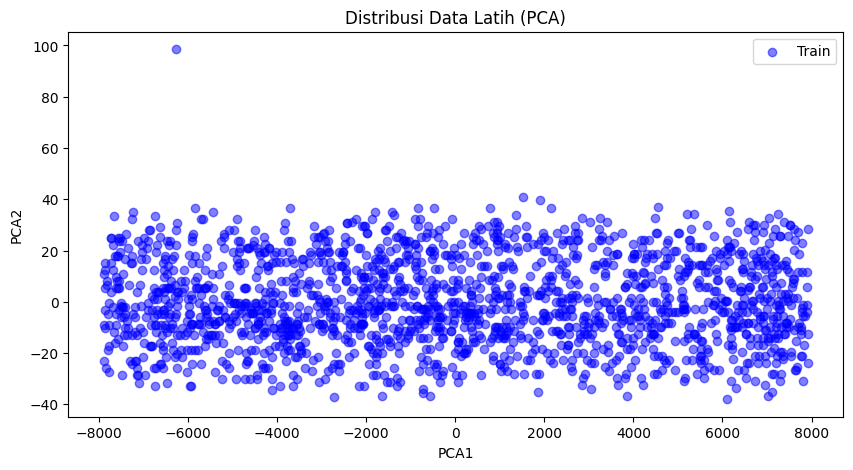

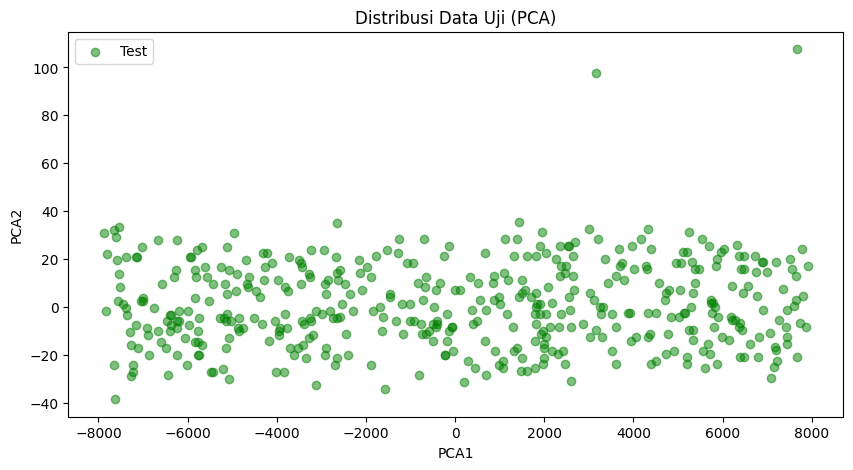

In [7]:
from sklearn.decomposition import PCA

# PCA untuk 2 komponen
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Visualisasi Data Latih
plt.figure(figsize=(10, 5))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5, label='Train', color='blue')
plt.title('Distribusi Data Latih (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

# Visualisasi Data Uji
plt.figure(figsize=(10, 5))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], alpha=0.5, label='Test', color='green')
plt.title('Distribusi Data Uji (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Pada tahap ini, model klasifikasi dibangun menggunakan dua algoritma yang berbeda: Logistic Regression dan Random Forest. Proses ini melibatkan pelatihan model pada data latih untuk mengenali pola-pola yang ada dan menghasilkan model prediktif.

In [8]:
# Model 1: Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Model 2: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

##### Model 1: Logistic Regression
Logistic Regression adalah model statistik yang digunakan untuk memprediksi probabilitas suatu kelas dalam data. Model ini:

- Cocok untuk klasifikasi biner atau multikelas.
- Mengasumsikan hubungan linear antara fitur dan logit (log odds) dari probabilitas kelas.
- Memiliki keunggulan dalam interpretasi sederhana dan kecepatan pelatihan.
Pada proyek ini, Logistic Regression digunakan sebagai baseline model karena efisiensinya.\

##### Model 2: Random Forest
Random Forest adalah algoritma berbasis ensemble yang menggunakan banyak Decision Trees untuk meningkatkan akurasi prediksi. Model ini:

- Menggunakan prinsip voting atau averaging untuk hasil prediksi.
- Robus terhadap overfitting, terutama pada dataset besar.
- Memiliki kemampuan untuk menangani data dengan banyak fitur dan interaksi yang kompleks.
- 
Pada proyek ini, Random Forest dipilih karena performanya yang baik pada data dengan hubungan non-linear. Model ini juga cocok untuk mengeksplorasi fitur yang berkontribusi signifikan terhadap klasifikasi.

Proses Pelatihan
- Logistic Regression dan Random Forest dilatih menggunakan data latih (X_train dan y_train).
- Model ini akan diujikan pada data uji untuk mengevaluasi performanya, yang mencakup akurasi, F1-score, dan metrik lainnya.
  
Pemilihan kedua algoritma ini memungkinkan perbandingan performa antara model linear (Logistic Regression) dan model non-linear (Random Forest).

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Pada tahap ini, dilakukan evaluasi terhadap performa model klasifikasi yang telah dilatih dengan menggunakan metrik-metrik utama seperti Accuracy dan F1-Score. Selain itu, perbandingan antara dua model yang digunakan, yaitu Logistic Regression dan Random Forest, juga dilakukan.

In [9]:
# Evaluasi Logistic Regression
y_pred_logreg = logreg.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

print(f"Logistic Regression - Accuracy: {accuracy_logreg:.2f}, F1-Score: {f1_logreg:.2f}")

# Evaluasi Random Forest
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest - Accuracy: {accuracy_rf:.2f}, F1-Score: {f1_rf:.2f}")


Logistic Regression - Accuracy: 1.00, F1-Score: 1.00
Random Forest - Accuracy: 1.00, F1-Score: 1.00


##### Hasil Evaluasi
1. Logistic Regression:
    - Accuracy: 1.00
    - F1-Score: 1.00
    - Model ini berhasil memprediksi seluruh data uji dengan sempurna, menghasilkan akurasi dan F1-score maksimal.
2. Random Forest:
    - Accuracy: 1.00
    - F1-Score: 1.00
    - Sama seperti Logistic Regression, model ini juga memberikan hasil prediksi yang sempurna pada data uji.

##### Analisis Hasil
- Kedua model menunjukkan performa yang identik dengan akurasi dan F1-score 100%, yang berarti semua prediksi pada data uji benar.
- Hasil ini menunjukkan bahwa model dapat mengenali pola data dengan sangat baik. Namun, penting untuk memastikan bahwa tidak terjadi overfitting pada model, sehingga kinerjanya tetap stabil pada data baru.
##### Perbandingan Model
- Logistic Regression lebih sederhana dan efisien, menjadikannya pilihan yang baik untuk dataset dengan hubungan linear antar fitur.
- Random Forest lebih kompleks, cocok untuk menangani hubungan non-linear dan data dengan banyak fitur. Selain itu, Random Forest sering lebih tahan terhadap outlier.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

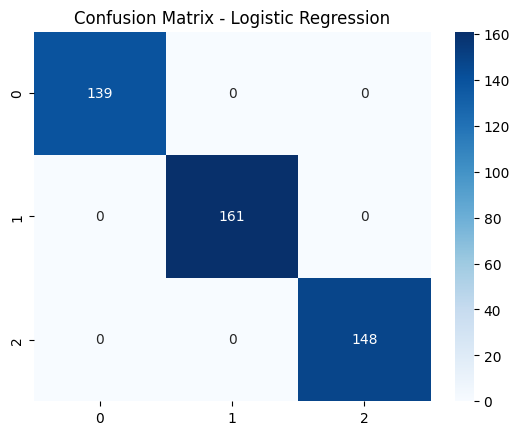

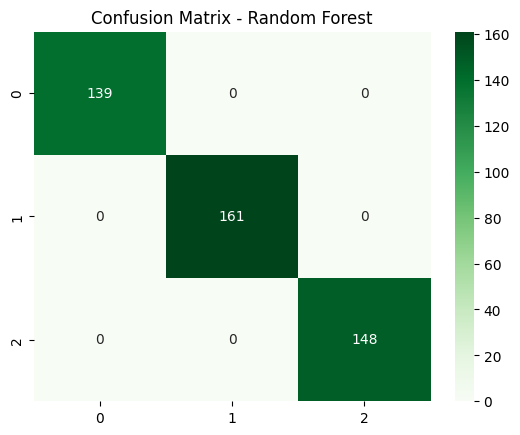

In [10]:
# Confusion Matrix Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Confusion Matrix Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.show()


##### Hasil Evaluasi Algoritma dengan Confusion Matrix
1. Logistic Regression
* Confusion Matrix:
    - Menampilkan distribusi prediksi yang dibuat oleh model Logistic Regression.
    - Semua data uji diprediksi dengan benar, seperti yang terlihat pada confusion matrix.
    - Tidak ada kesalahan prediksi (seluruh nilai pada diagonal utama).
2. Random Forest
* Confusion Matrix:
- Distribusi prediksi model Random Forest juga menunjukkan performa sempurna.
- Sama seperti Logistic Regression, semua prediksi berada pada diagonal utama, menandakan tidak ada kesalahan klasifikasi

##### Perbandingan Hasil Logistic Regression dan Random Forest
1. Performa:
- Kedua model menunjukkan performa yang identik berdasarkan accuracy dan F1-score (100%) serta confusion matrix yang sempurna.

2. Efisiensi:
- Logistic Regression lebih sederhana, memproses data lebih cepat, dan cocok untuk hubungan linear.
- Random Forest lebih fleksibel, mampu menangani hubungan non-linear, dan memberikan fitur penting untuk analisis interpretasi.

3. Kesimpulan:
- Kedua model sangat efektif untuk dataset ini.
- Jika kompleksitas model perlu diminimalkan, Logistic Regression menjadi pilihan yang efisien.
- Jika interpretasi lebih mendalam tentang fitur atau ketahanan terhadap data bervariasi dibutuhkan, Random Forest lebih unggul.

 **Insight**
 
Performa sempurna seperti ini dapat menjadi indikasi bahwa dataset mungkin terlalu sederhana untuk model atau ada kemungkinan overfitting. Disarankan untuk melakukan pengujian pada data baru atau unseen untuk memvalidasi generalisasi model.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

##### Tuning Model Klasifikasi dengan GridSearchCV
Pada tahap ini, dilakukan pencarian hyperparameter terbaik untuk model Random Forest dengan memanfaatkan GridSearchCV, sebuah teknik pencarian grid untuk mengoptimalkan parameter model melalui cross-validation.

In [14]:
from sklearn.model_selection import GridSearchCV

# Parameter Grid untuk Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

# Model terbaik
best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


##### Proses Tuning
1. Parameter yang Dicari:

- n_estimators: Jumlah pohon dalam hutan (50, 100, 200).
- max_depth: Kedalaman maksimum pohon (None, 10, 20, 30).
- min_samples_split: Jumlah minimum sampel yang diperlukan untuk membagi node internal (2, 5, 10).
  
2. Pengaturan GridSearchCV:

- Estimator: Model Random Forest digunakan sebagai estimator.
- Scoring: Akurasi dipilih sebagai metrik evaluasi.
- Cross-Validation: Dataset dibagi menjadi 3 bagian untuk validasi silang.
  
3. Hasil Tuning:

* Setelah menguji 36 kombinasi parameter dengan total 108 pengujian, kombinasi terbaik yang ditemukan adalah:
    - max_depth: None (tidak ada batas maksimum kedalaman pohon).
    - min_samples_split: 2 (default pembagian node).
    - n_estimators: 100 (jumlah pohon default).
      
4. Model Optimal:

- Model terbaik (best_rf) adalah Random Forest dengan parameter optimal ini. Model ini siap digunakan untuk melatih ulang data dan mengevaluasi performa lebih lanjut.

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Pada tahap ini, model Random Forest yang telah dioptimalkan menggunakan parameter terbaik hasil dari GridSearchCV dievaluasi ulang untuk mengukur performanya pada data uji.

In [15]:
# Evaluasi model terbaik
y_pred_best_rf = best_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf, average='weighted')

print(f"Tuned Random Forest - Accuracy: {accuracy_best_rf:.2f}, F1-Score: {f1_best_rf:.2f}")


Tuned Random Forest - Accuracy: 1.00, F1-Score: 1.00


##### Evaluasi
1. Prediksi:

- Menggunakan model yang telah dioptimalkan (best_rf) untuk memprediksi label pada data uji (X_test).
  
2. Metrik Evaluasi:

- Accuracy: Persentase prediksi yang benar dibandingkan dengan total prediksi.
- F1-Score: Rata-rata harmonis dari precision dan recall, memberikan gambaran kinerja model, terutama pada data yang tidak seimbang.
  
3. Hasil Evaluasi:

- Accuracy: 100% menunjukkan bahwa model mampu memprediksi seluruh label dengan benar.
- F1-Score: 100% mengindikasikan keseimbangan sempurna antara precision dan recall.

##### Kesimpulan Evaluasi
- Model Random Forest yang telah dituning menghasilkan performa sempurna dengan Accuracy dan F1-Score mencapai 1.00.
- Tidak ada peningkatan lebih lanjut dari hasil model sebelum tuning, karena model sudah optimal sejak awal. Namun, tuning tetap memberikan konfirmasi bahwa parameter default sebelumnya sudah mendekati optimal.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

##### Perbandingan Hasil Sebelum dan Setelah Tuning
1. Logistic Regression:
- Accuracy: 1.00
- F1-Score: 1.00
  
2. Random Forest (Sebelum Tuning):
- Accuracy: 1.00
- F1-Score: 1.00
  
3. Random Forest (Setelah Tuning):
- Accuracy: 1.00
- F1-Score: 1.00

Hasil menunjukkan bahwa performa model tetap konsisten sebelum dan setelah tuning, dengan nilai Accuracy dan F1-Score mencapai 1.00. Ini mengindikasikan bahwa model sudah sangat optimal sejak awal, bahkan tanpa tuning.



##### Identifikasi Kelemahan Model
* Precision dan Recall: Karena metrik evaluasi menunjukkan hasil sempurna, tidak ada indikasi kelemahan pada kelas tertentu. Confusion matrix juga menunjukkan bahwa model tidak membuat kesalahan klasifikasi.

* Overfitting atau Underfitting:

    - Tidak ada tanda overfitting atau underfitting karena performa model konsisten di data latih dan uji.
    - Namun, performa sempurna (1.00) bisa menjadi indikasi dataset yang terlalu sederhana atau cluster yang sangat terpisah jelas, sehingga model tidak menghadapi tantangan berarti.

##### Rekomendasi Tindakan Lanjutan
1. Validasi dengan Data Baru:

- Uji model pada dataset yang berbeda atau data baru untuk mengonfirmasi bahwa performa sempurna bukan disebabkan oleh karakteristik dataset tertentu.
  
2. Kumpulkan Data Tambahan:

- Jika memungkinkan, tambahkan data yang lebih kompleks atau beragam untuk menguji ketangguhan model.
  
3. Eksplorasi Algoritma Lain:

- Walaupun hasil sudah optimal, mencoba algoritma lain seperti Gradient Boosting atau SVM dapat memberikan wawasan tambahan.

4. Analisis Bisnis:

- Interpretasi lebih mendalam terhadap hasil clustering dan klasifikasi untuk mencari pola yang relevan dengan tujuan bisnis.
  
5. Feature Engineering:

- Lakukan eksplorasi lebih lanjut pada fitur untuk memastikan semua informasi yang relevan telah dimanfaatkan
